<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/10_API_Banco_Central_do_Brasil_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ricos pelo Acaso

Link do vídeo explicativo: https://youtu.be/7rFsu48oBn8

# Importando Bibliotecas

In [64]:
# Importa as bibliotecas
!pip install python-bcb

In [65]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

# Obtendo Dados através da API do Banco Central do Brasil
* buscar bcb sgs ou api bcb sgs

In [67]:
# Sistema Gerenciador de Séries Temporais do Banco Central
from bcb import sgs

* https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
* https://dadosabertos.bcb.gov.br/dataset

* https://wilsonfreitas.github.io/python-bcb/
* https://pypi.org/project/python-bcb/
* https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/

In [142]:
#url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(433)
df_teste = pd.read_json(url)
df_teste

,data,valor
0,01/02/1980,4.62
1,01/03/1980,6.04
2,01/04/1980,5.29
3,01/05/1980,5.70
4,01/06/1980,5.31
...,...,...
538,01/12/2024,0.52
539,01/01/2025,0.16
540,01/02/2025,1.31
541,01/03/2025,0.56


In [148]:
# mudando o formato da data
df_teste['data'] = pd.to_datetime(df_teste['data'], dayfirst=True)
df_teste

,data,valor
0,1980-02-01,4.62
1,1980-03-01,6.04
2,1980-04-01,5.29
3,1980-05-01,5.70
4,1980-06-01,5.31
...,...,...
538,2024-12-01,0.52
539,2025-01-01,0.16
540,2025-02-01,1.31
541,2025-03-01,0.56


In [150]:
# data como índice
df_teste.set_index('data', inplace=True)
df_teste

,valor
data,
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
1980-06-01,5.31
...,...
2024-12-01,0.52
2025-01-01,0.16
2025-02-01,1.31


In [74]:
# não utiliza a biblioteca python-bcp, chama a API do BC diretamente. Os dados vem no formato json
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

# Exemplo de Consultas à API do Banco Central do Brasil

### IPCA - Índice Nacional de Preços ao Consumidor Amplo

<Axes: xlabel='data'>

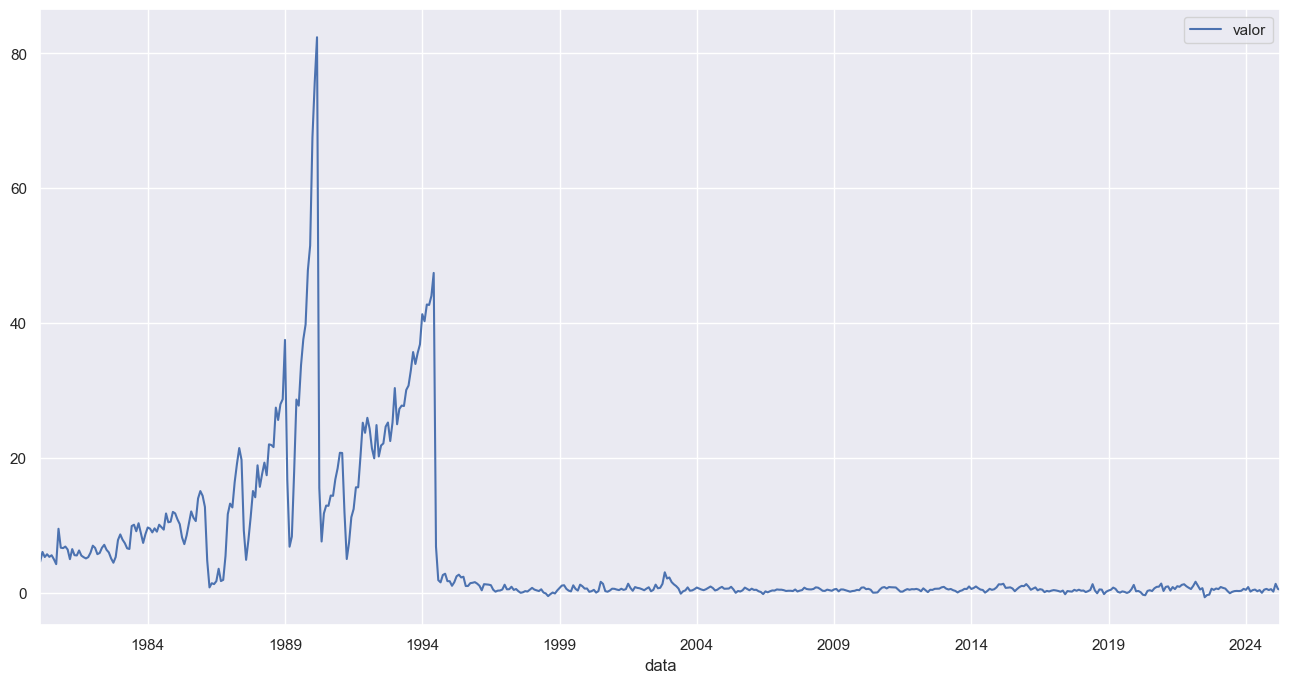

In [77]:
ipca = consulta_bc(433)
ipca.plot()

### IGP-M (Índice Geral de Preços – Mercado)
Usado como indexador para aluguel, tarifas públicas (como energia e telefonia), e outros contratos de prestação de serviços. 

<Axes: xlabel='data'>

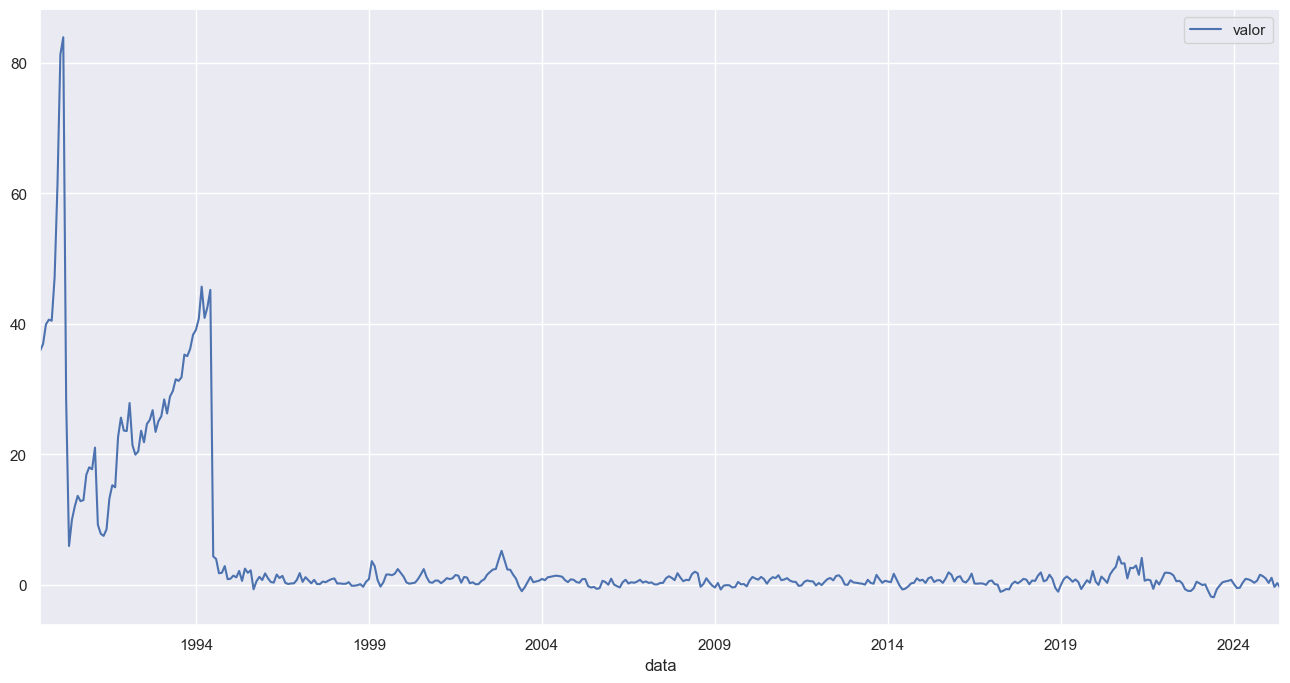

In [79]:
igpm = consulta_bc(189)
igpm = igpm[igpm.index.year > 1980]
igpm.plot()

In [80]:
# Consultar os dados do BC e garantir que seja um DataFrame/Série. Desde março de 2025, consulta limitada a 10 anos.
#selic_meta = consulta_bc(432) não funciona, precisa incluir filtro

* https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic

In [154]:
#url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=31/07/2017&dataFinal=16/03/2025'
#url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}.format(serie, data_inicial, data_final)'
#url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json' # erro, sem filtro
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados/ultimos/10?formato=json' # últimos 10 dias
df_selic = pd.read_json(url)
df_selic

,data,valor
0,09/06/2025,14.75
1,10/06/2025,14.75
2,11/06/2025,14.75
3,12/06/2025,14.75
4,13/06/2025,14.75
5,14/06/2025,14.75
6,15/06/2025,14.75
7,16/06/2025,14.75
8,17/06/2025,14.75
9,18/06/2025,14.75


In [89]:
# Busca a série da SELIC no SGS (máximo 10 anos) utlizando a biblioteca python-bc
selic = sgs.get({'selic':432}, start = '2018-01-01')

<Axes: xlabel='Date'>

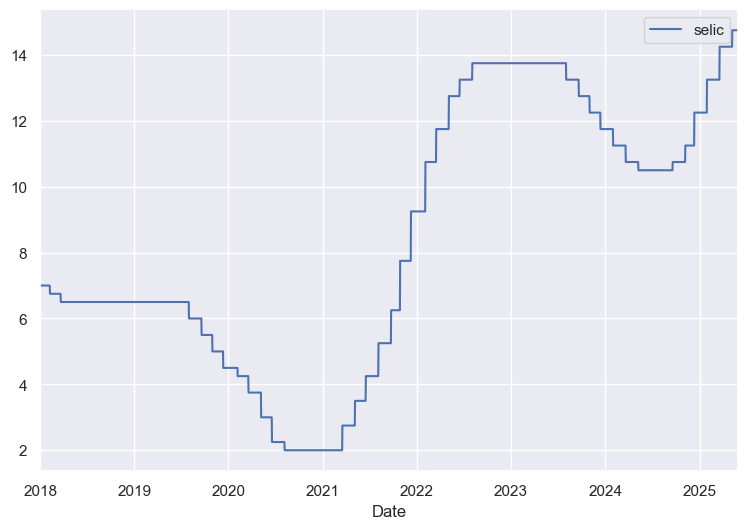

In [91]:
# Plota
sns.set_theme()
selic.plot(figsize = (9, 6))

<Axes: xlabel='Date'>

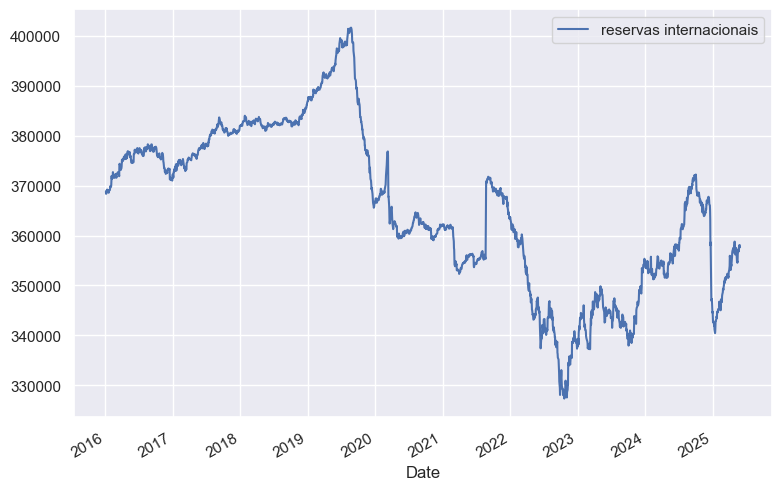

In [92]:
#reservas_internacionais = consulta_bc(13982)
reservas_internacionais = sgs.get({'reservas internacionais':13982}, start = '2016-01-01')
reservas_internacionais.plot(figsize = (9, 6))

<Axes: xlabel='data'>

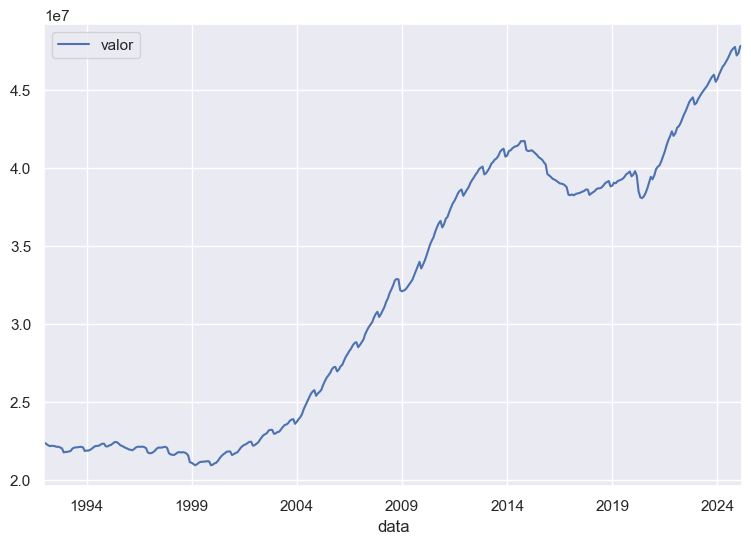

In [164]:
# Novo CAGED - estoque de empregos formais
pnad = consulta_bc(28763)
pnad.plot(figsize = (9, 6))

<Axes: xlabel='Date'>

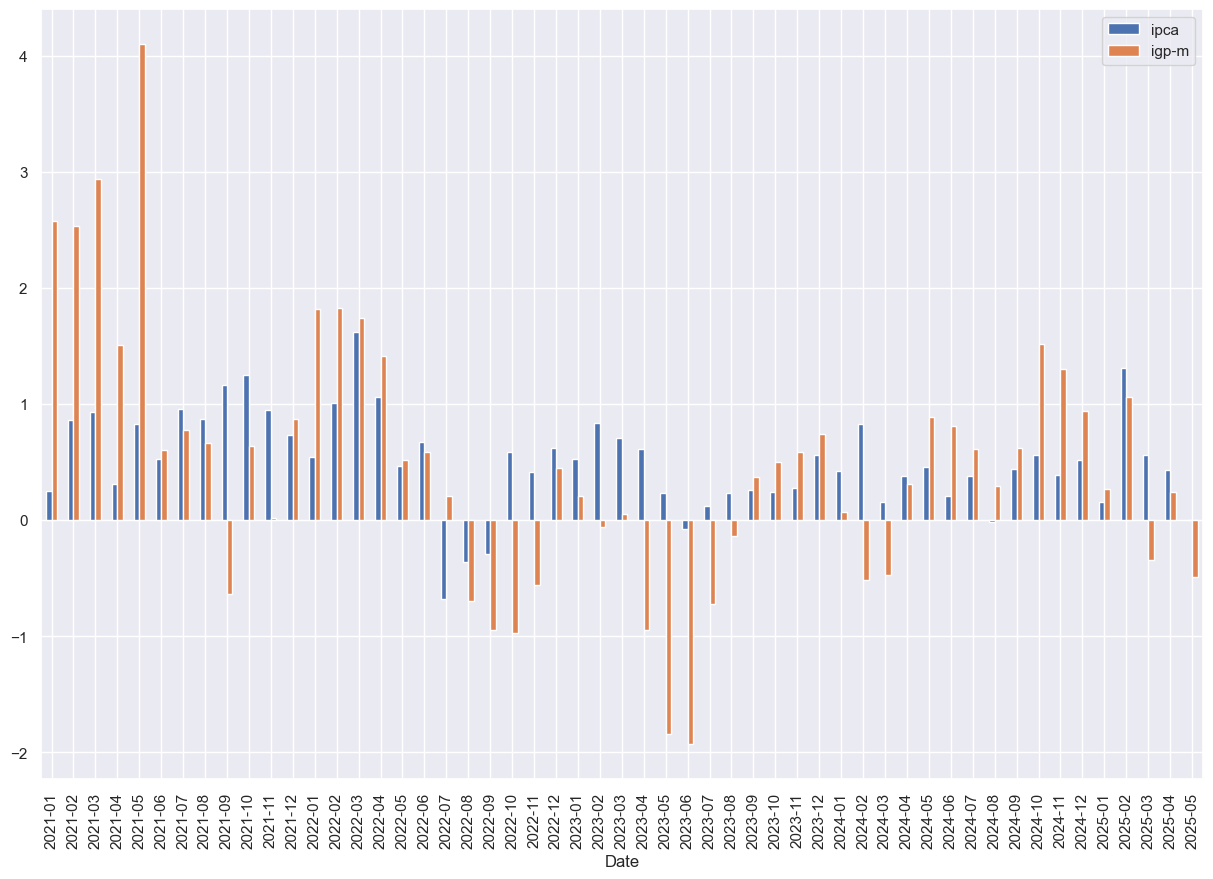

In [160]:
# Busca a série do IPCA e IGP-M
ifl_month = sgs.get({'ipca': 433,
             'igp-m': 189}, start = '2021-01-01')

# Transforma a frequência da data em mensal
ifl_month.index = ifl_month.index.to_period('M')

# Plota o gráfico de barras
ifl_month.plot(kind = 'bar', figsize = (15, 10))

In [96]:
from bcb import currency
currency.get_currency_list()

,code,name,symbol,country_code,country_name,type,exclusion_date
0,5,AFEGANE AFEGANIST,AFN,132,AFEGANISTAO ...,A,NaT
1,785,RANDE/AFRICA SUL,ZAR,7560,AFRICA DO SUL ...,A,NaT
2,490,LEK ALBANIA REP,ALL,175,"ALBANIA, REPUBLICA DA ...",A,NaT
3,610,MARCO ALEMAO,DEM,230,ALEMANHA ...,A,2002-01-02
4,978,EURO,EUR,230,ALEMANHA ...,B,NaT
...,...,...,...,...,...,...,...
269,220,DOLAR DOS EUA,USD,8664,"VIRGENS,ILHAS (E.U.A.) ...",A,NaT
270,766,QUACHA ZAMBIA,ZMW,8907,ZAMBIA ...,A,NaT
271,765,QUACHA ZAMBIA,ZMK,8907,ZAMBIA ...,A,2012-12-31
272,218,OURO DO ZIMBABWE,ZWG,6653,ZIMBABUE ...,A,NaT


<Axes: xlabel='Date'>

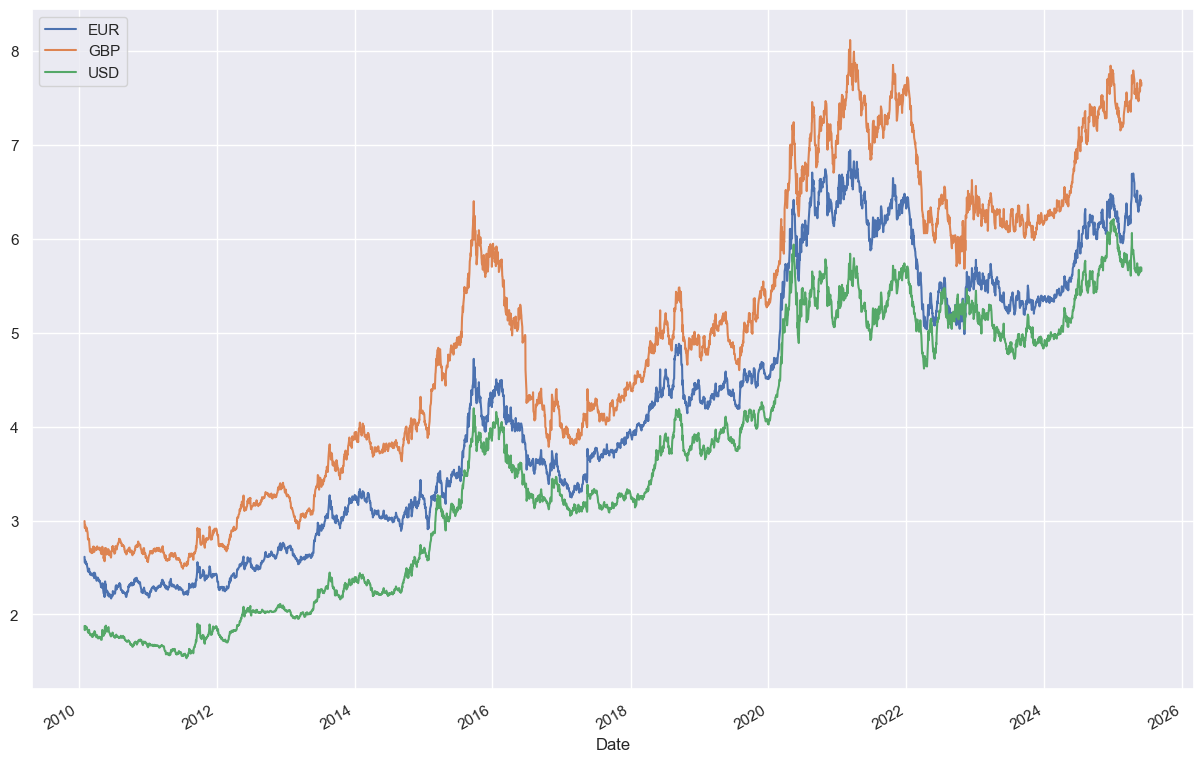

In [97]:
# Importando moedas com cotações em relação ao real
cy = currency.get(['USD', 'EUR', 'GBP'], start='2010-02-01', end='2025-05-29')
# Plota
cy.plot(figsize = (15, 10))

In [98]:
from bcb import Expectativas
# Obtém as informações do API
expec = Expectativas()
# Realiza a leitura dos endpoints
expec.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao24Meses
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [99]:
# Busca o endpoint, mostrando as colunas
expec.describe('ExpectativasMercadoAnuais')


EntitySet (Endpoint): ExpectativasMercadoAnuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoAnual
Properties: Indicador<str>, IndicadorDetalhe<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


In [100]:
# Importa o endpoint
ep = expec.get_endpoint('ExpectativasMercadoAnuais')
# Realiza o query com filtro
ep.query().filter(ep.Indicador == 'Selic').collect()

,Indicador,IndicadorDetalhe,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo
0,Selic,None,2000-01-03,2000,16.8300,16.65,1.5800,NaN,NaN,NaN,0
1,Selic,None,2000-01-04,2000,16.8300,16.65,1.5800,NaN,NaN,NaN,0
2,Selic,None,2000-01-05,2000,16.8800,16.80,1.5700,NaN,NaN,NaN,0
3,Selic,None,2000-01-06,2000,16.7300,16.80,1.1700,NaN,NaN,NaN,0
4,Selic,None,2000-01-07,2000,16.7300,16.80,1.1700,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
36047,Selic,None,2025-05-23,2025,14.7185,14.75,0.3141,13.7500,15.5,143.0,0
36048,Selic,None,2025-05-23,2026,12.4284,12.50,1.1460,9.5001,15.0,138.0,0
36049,Selic,None,2025-05-23,2027,10.4885,10.50,0.9411,7.5000,12.5,109.0,0
36050,Selic,None,2025-05-23,2028,9.8564,10.00,0.8641,7.5000,12.0,101.0,0


In [101]:
from bcb import TaxaJuros
# Salva as informações
juros = TaxaJuros()
# Descreve as informações
juros.describe()

EntitySets:
  TaxasJurosMensalPorMes
  ParametrosConsulta
  TaxasJurosDiariaPorInicioPeriodo
  ConsultaUnificada
  ConsultaDatas


In [102]:
juros.describe('TaxasJurosMensalPorMes')


EntitySet (Endpoint): TaxasJurosMensalPorMes
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosMensal
Properties: Mes<str>, Modalidade<str>, Posicao<int>, InstituicaoFinanceira<str>, TaxaJurosAoMes<float>, TaxaJurosAoAno<float>, cnpj8<str>, anoMes<str>


In [103]:
# Conecta com o endpoint. Taxas de juros de diversas instituições
tj = juros.get_endpoint('TaxasJurosMensalPorMes')
# Importa os dados
tj.query().limit(10).collect()

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8,anoMes
0,Abr-2025,Financiamento imobiliário com taxas de mercado...,1,CAIXA ECONOMICA FEDERAL,0.86,10.80,00360305,2025-04
1,Abr-2025,Financiamento imobiliário com taxas de mercado...,2,BCO SANTANDER (BRASIL) S.A.,1.21,15.50,90400888,2025-04
2,Abr-2025,Financiamento imobiliário com taxas de mercado...,3,APE POUPEX,1.48,19.29,00655522,2025-04
3,Abr-2025,Financiamento imobiliário com taxas de mercado...,1,APE POUPEX,0.81,10.16,00655522,2025-04
4,Abr-2025,Financiamento imobiliário com taxas de mercado...,2,CAIXA ECONOMICA FEDERAL,0.81,10.19,00360305,2025-04
5,Abr-2025,Financiamento imobiliário com taxas de mercado...,3,BCO DO ESTADO DO RS S.A.,0.82,10.29,92702067,2025-04
6,Abr-2025,Financiamento imobiliário com taxas de mercado...,4,BCO DO EST. DE SE S.A.,0.88,11.03,13009717,2025-04
7,Abr-2025,Financiamento imobiliário com taxas de mercado...,5,BANCO SICOOB S.A.,0.89,11.20,02038232,2025-04
8,Abr-2025,Financiamento imobiliário com taxas de mercado...,6,BANCO INTER,0.90,11.41,00416968,2025-04
9,Abr-2025,Financiamento imobiliário com taxas de mercado...,7,BCO BRADESCO S.A.,0.93,11.74,60746948,2025-04


# CDI vs IBOV

In [105]:
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [106]:
ibov = yf.download(tickers='^BVSP')[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [107]:
ibov_retorno = ibov.pct_change()

<Axes: xlabel='Date'>

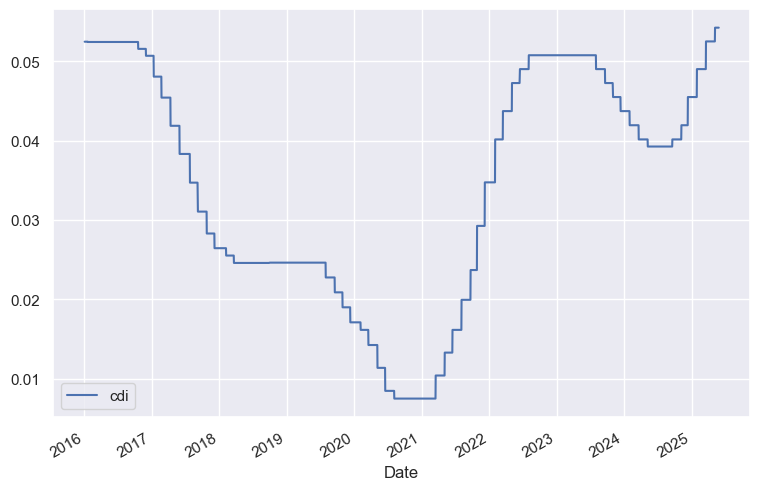

In [108]:
#cdi = consulta_bc(12)
# limitado a dez anos
cdi = sgs.get({'cdi':12}, start = '2016-01-01')
cdi.plot(figsize = (9, 6))

In [109]:
data_inicio = '2020-01-01'

In [110]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1
ibov_retorno_acumulado.iloc[-1]

Price  Ticker
Close  ^BVSP     1.196087
Name: 2025-05-29 00:00:00, dtype: float64

In [111]:
# transformando percentual para decimal
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1
cdi_acumulado.iloc[-1]

cdi    1.589365
Name: 2025-05-28 00:00:00, dtype: float64

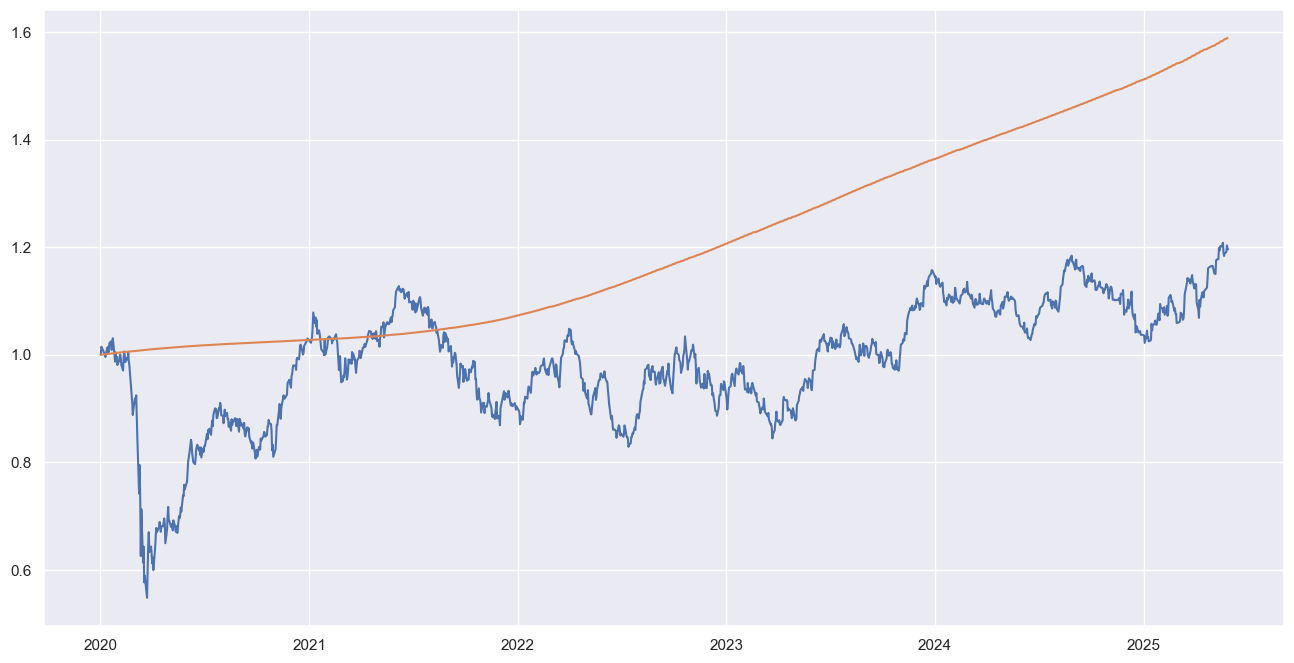

In [112]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);